<a href="https://colab.research.google.com/github/devngj/Diabetes/blob/main/drug_sideeffect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_path = '/content/drive/MyDrive/연구지도'
drug_se_vector = np.load(dir_path + '/drug_se_vector_dict.npy', allow_pickle=True)
id2num = np.load(dir_path + '/id2num.npy', allow_pickle=True)
drug_indications = np.load(dir_path + '/drug_indications.npy', allow_pickle=True)
t2d_drugs = np.load(dir_path + '/t2d_drugs.npy', allow_pickle=True)

In [ ]:
len(t2d_drugs.item())

1045

In [ ]:
drug_names = pd.read_csv(dir_path + '/drug_names.tsv', delimiter='\t')
symptoms = pd.read_csv(dir_path + '/symptoms.tsv', delimiter='\t')

In [ ]:
answer_list = []
for i in drug_se_vector.item().keys():
    if i in np.atleast_1d(t2d_drugs)[0]:
        answer_list.append(i)

len(answer_list)

564

In [ ]:
labels = []
for k in drug_se_vector.item().keys():
    if k in answer_list:
        labels.append(1)
    else:
        labels.append(0)

print(len(answer_list) == sum(labels))
print(len(drug_se_vector.item().values()) == len(labels))

True
True


In [ ]:
vals = []
for i in drug_se_vector.item(0).values():
    vals.append(np.array(i))

In [ ]:
vals = np.array(vals)

In [ ]:
vals

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Existing methods

In [ ]:
indices = np.arange(len(vals))
(
    X_train,
    X_test,
    y_train,
    y_test,
    indices_train,
    indices_test,
) = train_test_split(vals, labels, indices, test_size=0.2)

In [ ]:
from pandas.core.reshape.melt import lreshape
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve , roc_auc_score , f1_score , classification_report
import matplotlib.pyplot as plt
from sklearn import metrics

RFclf = RandomForestClassifier().fit(X_train, y_train)
SVclf = SVC(probability=True).fit(X_train, y_train)
LRclf = LogisticRegression().fit(X_train, y_train)
MLPclf = MLPClassifier().fit(X_train, y_train)

In [ ]:
from tqdm import tqdm
RFauc = []
RFprc = []
SVauc = []
SVprc = []
LRauc = []
LRprc = []
MLPauc = []
MLPprc = []

for _ in tqdm(range(100)):
    indices = np.arange(len(vals))
    (
        X_train,
        X_test,
        y_train,
        y_test,
        indices_train,
        indices_test,
    ) = train_test_split(vals, labels, indices, test_size=0.2)
    RFclf = RandomForestClassifier().fit(X_train, y_train)
    SVclf = SVC(probability=True).fit(X_train, y_train)
    LRclf = LogisticRegression().fit(X_train, y_train)
    MLPclf = MLPClassifier().fit(X_train, y_train)

    RFauc.append(metrics.roc_auc_score(y_test, RFclf.predict(X_test)))
    RFprc.append(metrics.f1_score(y_test, RFclf.predict(X_test)))
    SVauc.append(metrics.roc_auc_score(y_test, SVclf.predict(X_test)))
    SVprc.append(metrics.f1_score(y_test, SVclf.predict(X_test)))
    LRauc.append(metrics.roc_auc_score(y_test, LRclf.predict(X_test)))
    LRprc.append(metrics.f1_score(y_test, LRclf.predict(X_test)))
    MLPauc.append(metrics.roc_auc_score(y_test, MLPclf.predict(X_test)))
    MLPprc.append(metrics.f1_score(y_test, MLPclf.predict(X_test)))

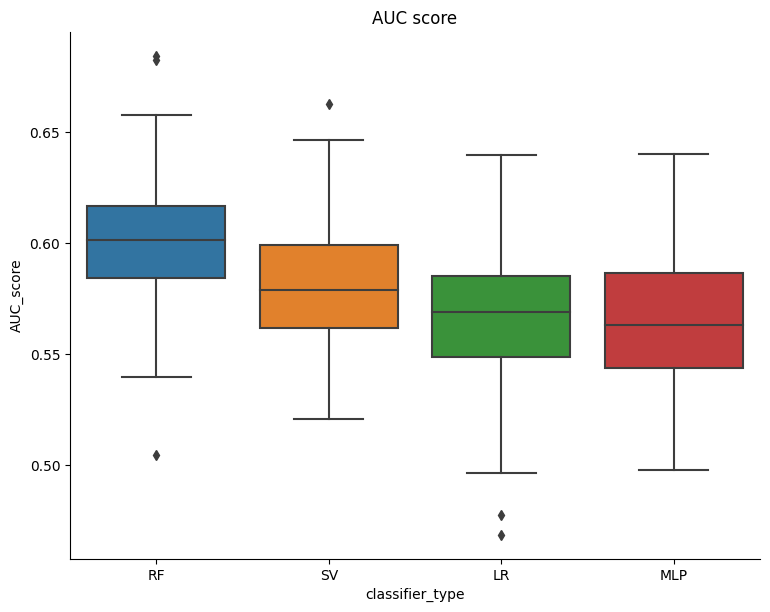

In [ ]:
df = pd.DataFrame(columns=['classifier_type', 'AUC_score', 'F1_score'])
df['classifier_type'] = ['RF']*100 + ['SV']*100 + ['LR']*100 +['MLP']*100
df['AUC_score'] = RFauc + SVauc + LRauc + MLPauc
df['F1_score'] = RFprc + SVprc + LRprc + MLPprc

import seaborn as sns

sns.catplot(x='classifier_type', y='AUC_score',
                data=df, kind="box",
            height=6, aspect=1.3).set(title='AUC score')


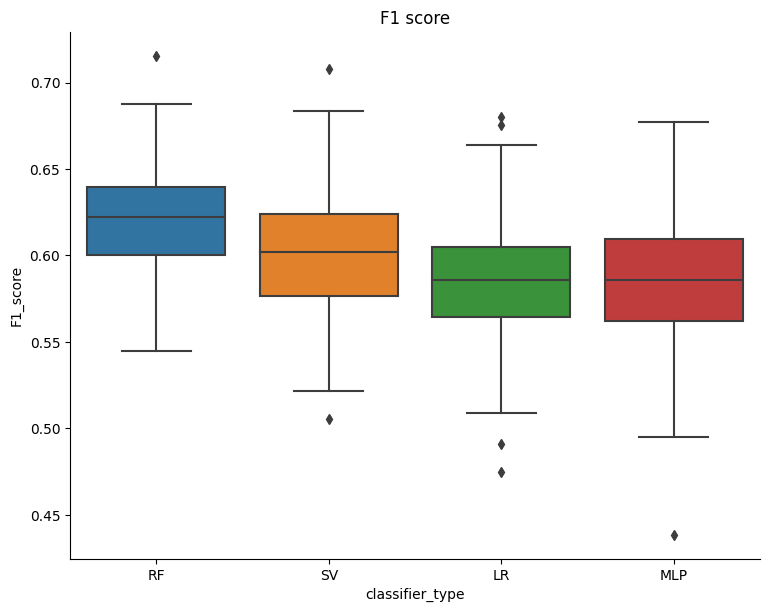

In [ ]:
sns.catplot(x='classifier_type', y='F1_score',
                data=df, kind="box",
            height=6, aspect=1.3).set(title='F1 score')

In [ ]:
for clf in [RFclf, SVclf, LRclf, MLPclf]:
    pred = clf.predict(X_test)
    print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58        94
           1       0.65      0.60      0.62       117

    accuracy                           0.60       211
   macro avg       0.60      0.60      0.60       211
weighted avg       0.61      0.60      0.60       211

              precision    recall  f1-score   support

           0       0.58      0.59      0.59       101
           1       0.62      0.60      0.61       110

    accuracy                           0.60       211
   macro avg       0.60      0.60      0.60       211
weighted avg       0.60      0.60      0.60       211

              precision    recall  f1-score   support

           0       0.54      0.57      0.55        99
           1       0.60      0.57      0.58       112

    accuracy                           0.57       211
   macro avg       0.57      0.57      0.57       211
weighted avg       0.57      0.57      0.57       211

              preci

In [ ]:
probs = pd.DataFrame(RFclf.predict_proba(X_test))

In [ ]:
probs[1].loc[probs[1] > 0.5].index

Int64Index([  1,   2,   3,   4,   5,   8,  11,  12,  13,  15,
            ...
            192, 196, 201, 202, 203, 204, 206, 207, 208, 210],
           dtype='int64', length=117)

In [ ]:
thres = 0.9
indices_test[probs[1].loc[probs[1] > thres].index] # <-- candidate drugs

array([800])

In [ ]:
repurposable = []
for i in range(100):
    indices = np.arange(len(vals))
    (
        X_train,
        X_test,
        y_train,
        y_test,
        indices_train,
        indices_test,
    ) = train_test_split(vals, labels, indices, test_size=0.2)
    RFclf = RandomForestClassifier().fit(X_train, y_train)
    probs = pd.DataFrame(RFclf.predict_proba(X_test))
    thres = 0.7
    if len(indices_test[probs[1].loc[probs[1] > thres].index]) != 0:
        repurposable.append(indices_test[probs[1].loc[probs[1] > thres].index][0]) # <-- candidate drugs


In [ ]:
idx, count = np.unique(repurposable,return_counts=True)
result = []
for i in range(len(idx)):
    result.append((count[i], idx[i]))

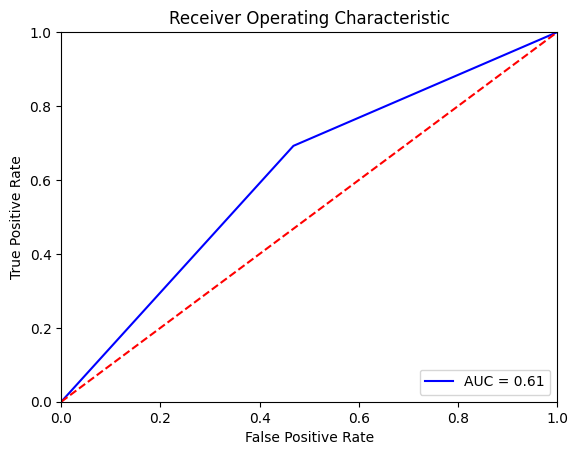

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, RFclf.predict(X_test))
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

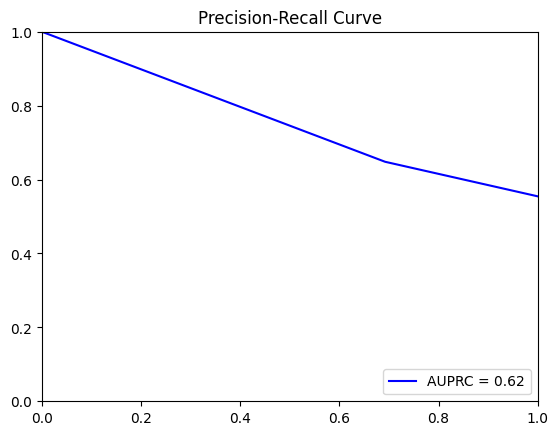

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, RFclf.predict(X_test))
auprc = metrics.average_precision_score(y_test, RFclf.predict(X_test))

plt.title('Precision-Recall Curve')
plt.plot(recall, precision, 'b', label = 'AUPRC = %0.2f' % auprc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
sorted(result, reverse=True)

[(3, 216),
 (3, 125),
 (2, 992),
 (2, 811),
 (2, 713),
 (2, 638),
 (2, 554),
 (2, 501),
 (2, 458),
 (2, 322),
 (2, 309),
 (2, 225),
 (2, 219),
 (2, 214),
 (2, 208),
 (2, 207),
 (2, 152),
 (2, 149),
 (1, 971),
 (1, 968),
 (1, 941),
 (1, 924),
 (1, 868),
 (1, 865),
 (1, 802),
 (1, 800),
 (1, 779),
 (1, 750),
 (1, 742),
 (1, 733),
 (1, 722),
 (1, 696),
 (1, 689),
 (1, 687),
 (1, 684),
 (1, 622),
 (1, 587),
 (1, 586),
 (1, 576),
 (1, 537),
 (1, 528),
 (1, 527),
 (1, 517),
 (1, 507),
 (1, 503),
 (1, 466),
 (1, 430),
 (1, 412),
 (1, 395),
 (1, 393),
 (1, 392),
 (1, 361),
 (1, 349),
 (1, 332),
 (1, 311),
 (1, 275),
 (1, 267),
 (1, 250),
 (1, 238),
 (1, 227),
 (1, 210),
 (1, 209),
 (1, 203),
 (1, 199),
 (1, 183),
 (1, 164),
 (1, 163),
 (1, 144),
 (1, 136),
 (1, 104),
 (1, 99),
 (1, 97),
 (1, 90),
 (1, 88),
 (1, 82),
 (1, 81),
 (1, 58),
 (1, 39),
 (1, 19),
 (1, 8)]

In [ ]:
list(drug_se_vector.item().keys())[992]

'DB08269'

# Novel method

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def overlap_percentage(vector1, vector2):
    intersection = sum([i & j for i, j in zip(vector1, vector2)])
    union = sum([i | j for i, j in zip(vector1, vector2)])

    if union == 0:
        return 0  # Prevent division by zero if there are no side effects

    return intersection / union


def create_network(drug_dict, threshold=0.5):
    G = nx.Graph()

    drugs = list(drug_dict.keys())
    for i in range(len(drugs)):
        for j in range(i+1, len(drugs)):
            drug1 = drugs[i]
            drug2 = drugs[j]
            overlap = overlap_percentage(drug_dict[drug1], drug_dict[drug2])
            if overlap >= threshold:
                G.add_edge(drug1, drug2, weight=overlap)

    return G

# Example usage:
drug_dict = drug_se_vector.item()

'''for element in drug_se_vector:
    drug_dict.update(element)'''

G = create_network(drug_dict, threshold=0.0)

In [ ]:
import random
from collections import Counter
from tqdm import tqdm

def weighted_random_walk(graph, start_node, num_steps):
    current_node = start_node
    for _ in range(num_steps):
        neighbors = list(graph.neighbors(current_node))
        if neighbors:
            # Get the weights of the edges to neighbors
            weights = [graph[current_node][neighbor].get('weight', 1) for neighbor in neighbors]
            # Normalize the weights
            total_weight = sum(weights)
            probabilities = [weight / total_weight for weight in weights]
            # Choose the next node based on the weights
            current_node = random.choices(neighbors, probabilities)[0]
        else:
            break
    return current_node


def propagation_effect(graph, start_node, num_walks, num_steps):
    end_nodes = [weighted_random_walk(graph, start_node, num_steps) for _ in range(num_walks)]
    propagation_counts = Counter(end_nodes)

    # Creating a vector of counts ordered by node labels
    nodes = sorted(graph.nodes())
    propagation_vector = [propagation_counts[node]/(num_walks * num_steps) if node in propagation_counts else 0 for node in nodes]

    return propagation_vector

In [ ]:
effect_vectors = []
for node in tqdm(sorted(G.nodes)):
    start_node = node
    num_walks = 100
    num_steps = 5
    propagation = propagation_effect(G, start_node, num_walks, num_steps)
    effect_vectors.append(propagation)

100%|██████████| 1051/1051 [12:05<00:00,  1.45it/s]


In [ ]:
np.save(dir_path + '/RW_result.npy', effect_vectors, allow_pickle=True)

In [ ]:
# evecs = np.load(dir_path + '/RW_result.npy', allow_pickle=True)
evecs = effect_vectors

In [ ]:
new_labels = []
for k in sorted(G.nodes):
    if k in answer_list:
        new_labels.append(1)
    else:
        new_labels.append(0)

print(len(answer_list) == sum(new_labels))
print(len(G.nodes) == len(new_labels))

True
True


In [ ]:
indices = np.arange(len(evecs))
(
    X_train,
    X_test,
    y_train,
    y_test,
    indices_train,
    indices_test,
) = train_test_split(evecs, new_labels, indices, test_size=0.2)

In [ ]:
from pandas.core.reshape.melt import lreshape
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve , roc_auc_score , f1_score , classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from tqdm import tqdm
import warnings

RFauc = []
RFprc = []
SVauc = []
SVprc = []
LRauc = []
LRprc = []
MLPauc = []
MLPprc = []
XGBauc = []
XGBprc = []


with warnings.catch_warnings(record=True) as caught_warnings:
    for _ in tqdm(range(100)):
        indices = np.arange(len(evecs))
        (
            X_train,
            X_test,
            y_train,
            y_test,
            indices_train,
            indices_test,
        ) = train_test_split(evecs, new_labels, indices, test_size=0.2)

        RFclf = RandomForestClassifier().fit(X_train, y_train)
        SVclf = SVC(probability=True).fit(X_train, y_train)
        LRclf = LogisticRegression().fit(X_train, y_train)
        MLPclf = MLPClassifier().fit(X_train, y_train)
        XGBclf = xgb.XGBClassifier().fit(X_train, y_train)

        RFauc.append(metrics.roc_auc_score(y_test, RFclf.predict(X_test)))
        RFprc.append(metrics.f1_score(y_test, RFclf.predict(X_test)))
        SVauc.append(metrics.roc_auc_score(y_test, SVclf.predict(X_test)))
        SVprc.append(metrics.f1_score(y_test, SVclf.predict(X_test)))
        LRauc.append(metrics.roc_auc_score(y_test, LRclf.predict(X_test)))
        LRprc.append(metrics.f1_score(y_test, LRclf.predict(X_test)))
        MLPauc.append(metrics.roc_auc_score(y_test, MLPclf.predict(X_test)))
        MLPprc.append(metrics.f1_score(y_test, MLPclf.predict(X_test)))
        XGBauc.append(metrics.roc_auc_score(y_test, XGBclf.predict(X_test)))
        XGBprc.append(metrics.f1_score(y_test, XGBclf.predict(X_test)))

100%|██████████| 100/100 [21:46<00:00, 13.06s/it]


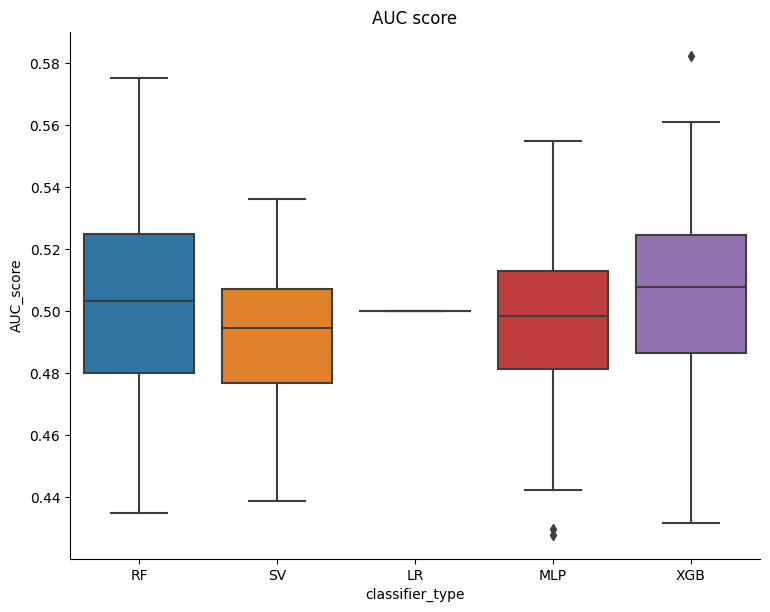

In [ ]:
df = pd.DataFrame(columns=['classifier_type', 'AUC_score', 'F1_score'])
df['classifier_type'] = ['RF']*100 + ['SV']*100 + ['LR']*100 +['MLP']*100 + ['XGB']*100
df['AUC_score'] = RFauc + SVauc + LRauc + MLPauc + XGBauc
df['F1_score'] = RFprc + SVprc + LRprc + MLPprc + XGBprc

import seaborn as sns

sns.catplot(x='classifier_type', y='AUC_score',
                data=df, kind="box",
            height=6, aspect=1.3).set(title='AUC score')


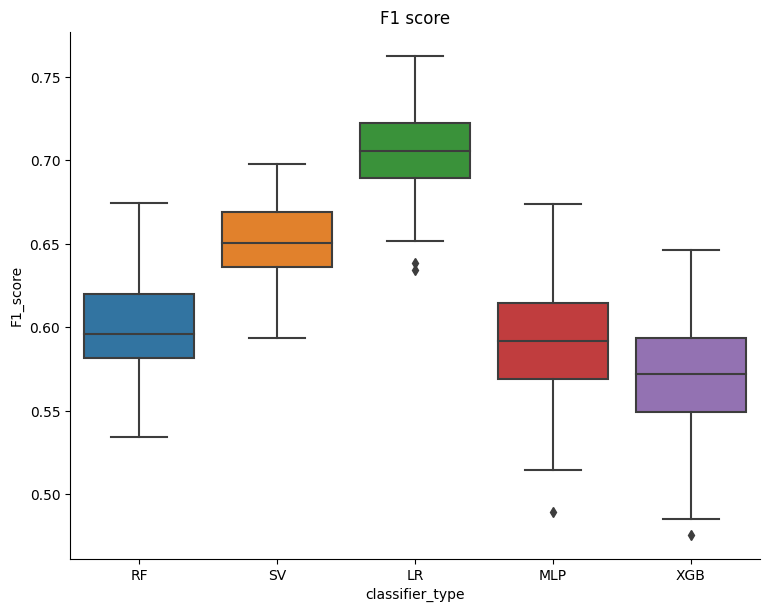

In [ ]:
sns.catplot(x='classifier_type', y='F1_score',
                data=df, kind="box",
            height=6, aspect=1.3).set(title='F1 score')

In [ ]:
for clf in [RFclf, SVclf, LRclf, MLPclf, XGBclf]:
    pred = clf.predict(X_test)
    print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.37      0.48      0.42        71
           1       0.69      0.59      0.64       140

    accuracy                           0.55       211
   macro avg       0.53      0.54      0.53       211
weighted avg       0.58      0.55      0.56       211

              precision    recall  f1-score   support

           0       0.20      0.47      0.28        38
           1       0.83      0.58      0.68       173

    accuracy                           0.56       211
   macro avg       0.52      0.53      0.48       211
weighted avg       0.72      0.56      0.61       211

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.57      0.73       211

    accuracy                           0.57       211
   macro avg       0.50      0.28      0.36       211
weighted avg       1.00      0.57      0.73       211

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
filtered_indices = [index for index, label in zip(indices_train, y_train) if label == 1]


In [ ]:
len([i for i in new_labels if i == 1])

564

In [ ]:
def sum_columns(binary_arrays):
    return [sum(col) for col in zip(*binary_arrays)]

print(sum_columns(vals[filtered_indices]))
print(sum_columns(vals))

[226, 198, 105, 353, 14, 42, 53, 43, 204, 169, 93, 219, 228, 7, 33, 14, 2, 207, 161, 37, 407, 378, 304, 217, 1, 264, 14, 212, 254, 71, 265, 139, 150, 233, 75, 71, 195, 380, 66, 136, 50, 152, 224, 114, 33, 93, 50, 184, 187, 150, 12, 50, 205, 106, 165, 63, 229, 19, 22, 87, 101, 27, 334, 246, 62, 265, 37, 228, 212, 324, 137, 91, 2, 58, 53, 178, 192, 55, 83, 120, 26, 16, 364, 171, 1, 203, 23, 350, 126, 31, 166, 82, 233, 23, 75, 40, 77, 159, 262, 12, 43, 87, 7, 63, 264, 177, 50, 38, 15, 291, 0, 16, 0, 40, 78, 40, 25, 60, 46, 78, 36, 88, 39, 83, 143, 13, 65, 34, 198, 69, 45, 99, 218, 59, 18, 197, 264, 6, 11, 85, 94, 60, 55, 24, 1, 47, 146, 7, 115, 170, 60, 93, 105, 57, 56, 137, 5, 237, 39, 115, 19, 170, 21, 191, 36, 3, 4, 81, 51, 107, 58, 36, 3, 38, 90, 14, 74, 10, 2, 88, 23, 29, 20, 29, 12, 91, 4, 15, 88, 253, 89, 14, 76, 36, 1, 253, 6, 175, 22, 13, 4, 125, 10, 54, 136, 16, 182, 51, 21, 52, 88, 87, 65, 145, 5, 4, 141, 17, 154, 17, 64, 50, 89, 131, 5, 38, 12, 43, 63, 41, 71, 19, 64, 2, 38, 4

In [ ]:
vals

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
a = sum_columns(vals[filtered_indices])
b = sum_columns(vals)
np.where(np.array(a) == 0)

(array([110, 112, 264, 336, 362, 378, 381, 397, 399, 401, 411, 452, 476,
        513, 533, 552, 559, 568, 575, 577, 582, 586, 587, 591, 614, 621,
        626, 628, 630, 632, 635, 636, 647, 652, 656, 659, 675, 678, 682,
        684, 688, 691, 695, 706, 715, 719, 720, 724, 725, 726, 730, 741,
        745, 746, 759, 762, 763, 766, 770, 773, 776, 782, 784, 788, 789,
        790, 794, 795, 796, 809, 811, 815, 818, 819, 820, 822, 824, 829,
        830, 831, 832, 833, 835, 841, 842, 844, 847, 848, 849, 851, 857,
        858, 859, 862, 863, 867, 868, 869, 872, 876, 879, 882, 883, 885,
        887, 889, 890, 892, 893, 894, 895, 896, 897, 903, 904, 906, 908,
        909, 911, 912, 913, 915, 919, 923, 924, 928, 931, 932, 933, 934,
        936, 938, 939, 940, 941, 942, 944, 945, 947, 948, 950, 951, 952,
        953, 954, 957, 960, 962, 963, 964]),)

In [ ]:
b.count(208)

0